<a href="https://colab.research.google.com/github/vivek72v/Mobile_Price_Range_Prediction/blob/main/Mobile_Price_range_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - MOBILE PRICE RANGE PREDICTION



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team member 1**   - Vivek Kumar Singh

# **Project Summary -**


#Data Preprocessing
*	First the needed modules are imported
*	Google Drive is mounted
*	The dataset is read.
*	First five rows of the dataset is viewed
*	Columns of the dataset are checked for null or missing values and the data types of the columns are checked.
*	Descriptive statistics of the datset is obtained
*	Descriptive statistics shows minimum value of columns ‘sc_w’ and ‘px_height’ is zero which is not possible so it is just wrong data input.
*	Treating rows with ‘sc_w’ zero
*   Number of rows having ‘sc_w’ zero is counted
*	  Mean of the ‘sc_w’(screen weight) grouped by ‘sc_h’(screen height) is calculated
*	A dictionary is created with screen height as index and the mean values of screen width grouped by screen height as values.
*	Using this dictionary we impute the mean value of screen width according to screen height where screen weight is found to be zero
*Only two rows have ‘px_height’ equal to zero so we drop these records.
*	Next we divide our columns in differengt  categories like categorical , numerical, binary.
#Exploratory Data Analysis
* Pie Chart to show the distribution of Mobile Phones in different price range
* Barchart to check the distribution of each categorical feature.
* Barplot of each categorical columns for each of the four price range
* Pie chart to visualize the distribution of  network support of mobile phones
*Barchart showing distribution of the different type of network in mobile phones according to price range.
*Piechart to check the distribution of Mobile Phones without camera in every price range.
*Barchart to show the distribution of mobile phones available according to the number of binary features available in every price range
*Barplot to analyze the effect of clock speed on price range
*KDE Plot to visualize distribution of the sum of primary and front camera
*Distribution Plot of the Numerical features
*Barplot of mean of numerical features and price_range
*Box plot for each price range.
*KDE plot  for each price range.
*Correlation Heatmap of Numerical Features
*Pairplot for the given datset
#Hypothesis testing
*   Mobiles in price range 2(high cost) has average RAM of atleast 800 mb
*   Mobiles in price range 2(medium cost) has average primary camera of 8 megapixel.
*   Mobiles have average talktime of  11 hours
#Feature Engineering
*Outlier analyis done using boxplot
*Outlier detected is treated using squareroot of columns having outliers
*Data is split into dependent variable set and independent variable set,
*Data is split into train and test set in ratio of 80% for training and 20% for testing
#ML Model Implementation
*Function to give metrics like accuracy, precision , recall,f1scoe , support and plots confusion matrix of model used is created.
*Function to show the feature importance of model used is created.
* Three models are used to train the data for prediction of price range .The models used are :
1. Gradient Boosting Classifier
2. Random Forest Classifier
3. XG Boost Classifier





# **GitHub Link -**

https://github.com/vivek72v/Mobile_Price_Range_Prediction

# **Problem Statement**


In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import *
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')
#Reading DataSet
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/DataSets/data_mobile_price_range.csv")

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


Text(0.5, 1.0, ' Visualising Missing Values')

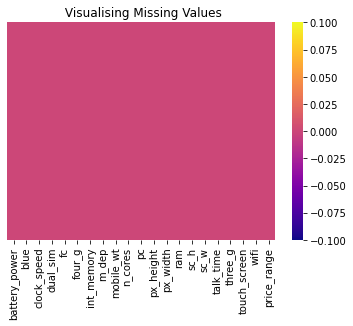

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

There are no null values in the dataset

### What did you know about your dataset?

The Mobile Price Range Prediction dataset provided has four categories of price range 0,1,2,3 the meaning of each category is :
* 0 -- low cost
* 1 -- medium cost
* 2 – high cost
* 3 – very high cost

The specification of the mobiles such as battery power , clock speed , internal memory, number of cores of processor and other important features of mobile phone has been provided .The price range is dependent on the features of the mobile phone .By use of proper ML algorithms price range of the mobiles having specific features can be predicted to a considerable accuracy.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'all')

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

### Variables Description 

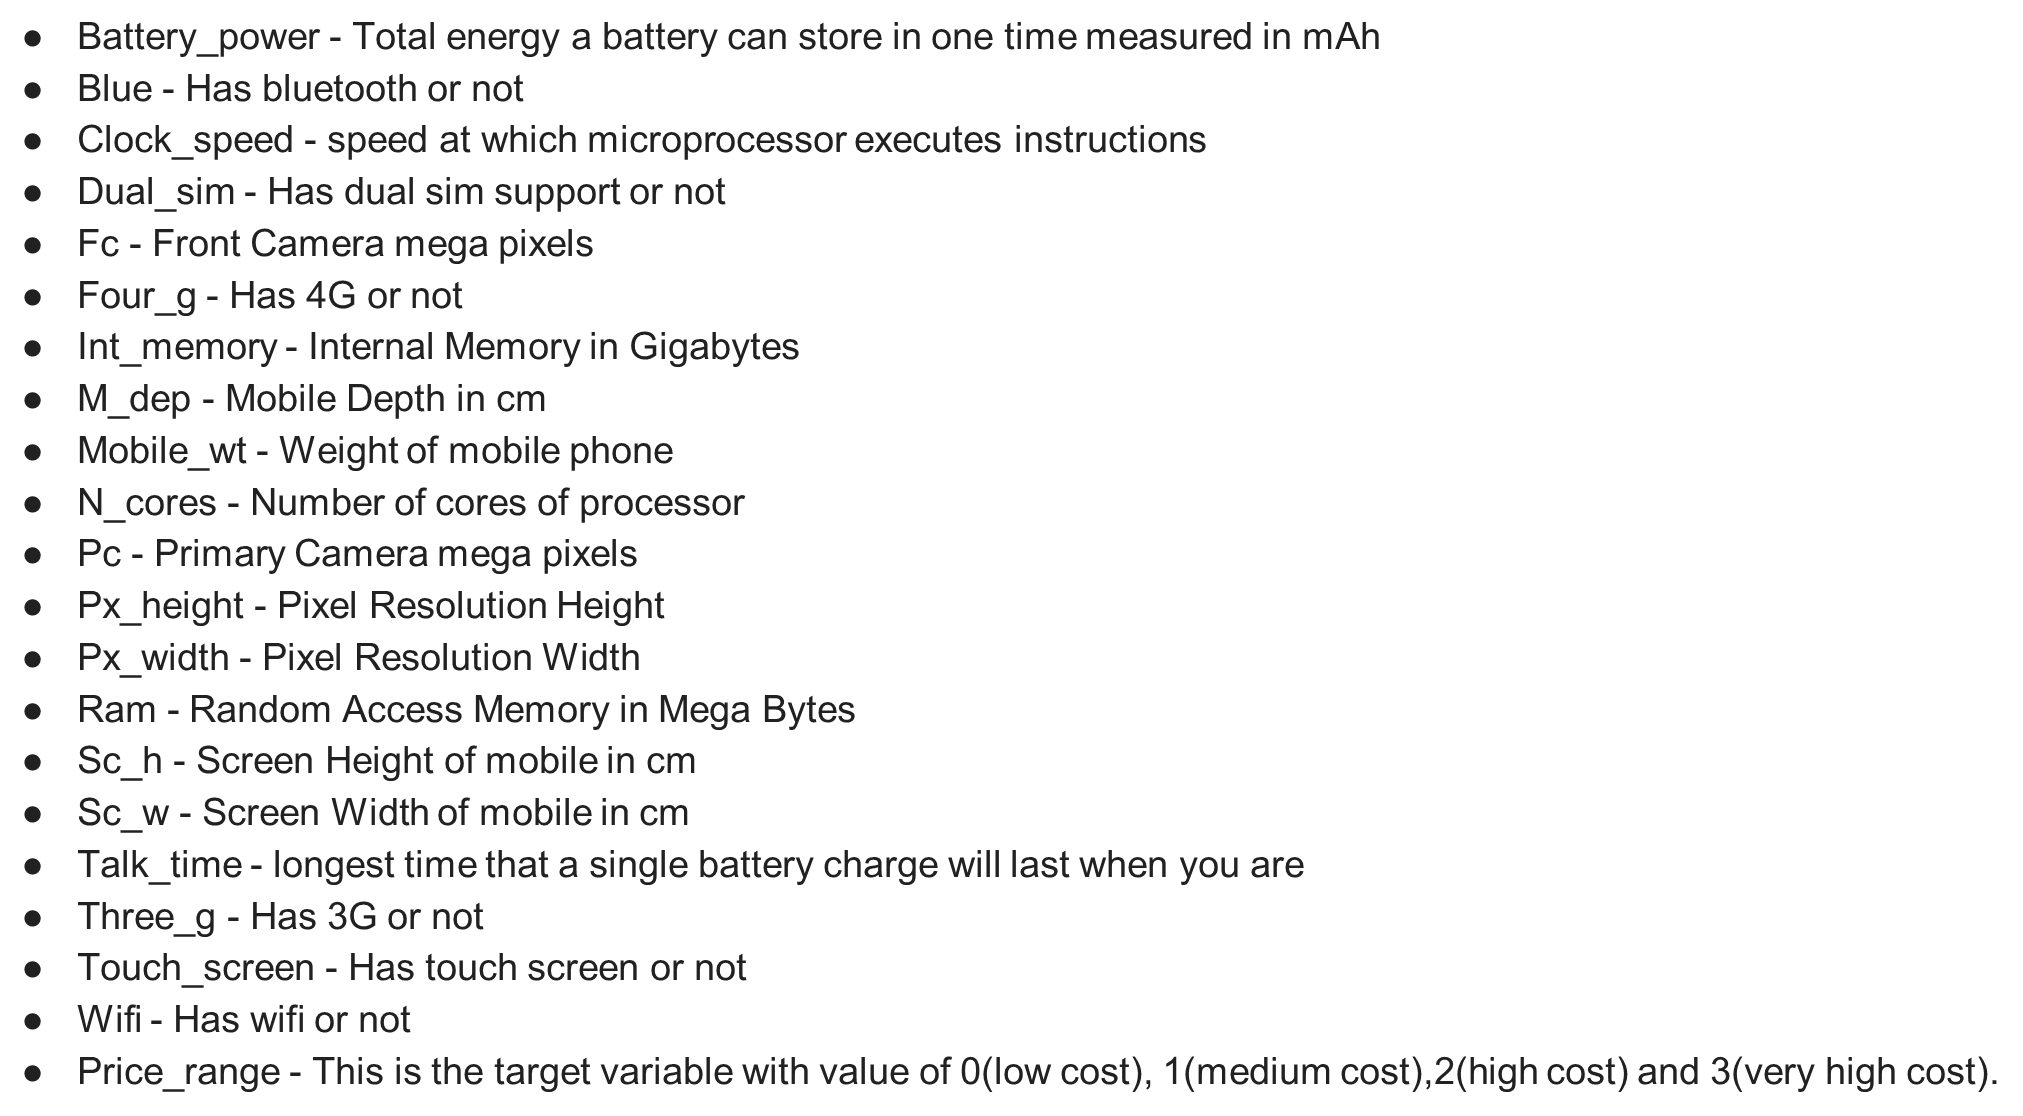



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .




## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# checking how many rows have  'sc_w' 0
df[df['sc_w']==0].shape[0]

180

In [ ]:
#Finding the mean of the 'sc_w of the corresponding record according to different 'sc_h' 
srs = df[df['sc_w']!=0].groupby(by='sc_h')['sc_w'].mean()

In [ ]:
##Treating the rows with 'sc_w' value equal to zero 
#The srs series is converted into a dictionary names d 
d = dict(zip(srs.index,np.round(srs.values)))
#For loop for 2000 rows present in the dataset
for i in range(2000):            
#If the screen width is zero in a row of dataframe then it is imputed with the corresponding value of dictionary d having key equal to the screen height in this row
    if df['sc_w'][i] == 0:
        df['sc_w'][i]= d[df['sc_h'][i]]

In [ ]:
#Converting columns 'sc_h' and 'sc_w' in a single column screen_size , it will be the diagonal length of the mobile screen size.
df['screen_size'] = ((df['sc_h']**2)+(df['sc_w']**2))**0.5
df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)

In [ ]:
#observations where 'px_height' is 0
df[df['px_height']==0]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  talk_time  \
1481    0.1         99        4  11          0      1987  3692         16   
1933    0.6        154        8  10          0       994  1958          7   

      three_g  touch_screen  wifi  price_range  screen_size  
1481        1             1     0            3    14.764823  
1933        1             1     0            1     8.602325

In [ ]:
#Droping the records having 'px_h' equal to zero
df.drop(axis = 0 , index = [1481,1933], inplace = True )

In [ ]:
#Checking'px_height' with  0 value treated successfully
df[df['px_height']==0]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, talk_time, three_g, touch_screen, wifi, price_range, screen_size]
Index: []

In [ ]:
#Making columns px_height and px_width in a single column
df['pixels'] = df['px_height']*df['px_width']

In [ ]:
#Dropping the column px_height and px_width
df.drop(['px_height','px_width'], axis=1 ,inplace=True)

In [ ]:
# categorical and numerical separation
#list of categorical columns
categoricals = [ 'blue',  'dual_sim',  'four_g','three_g', 'touch_screen', 'wifi', 'n_cores','price_range']
#list of independent categorical columns
independent_categoricals = [ 'blue',  'dual_sim',  'four_g','three_g', 'touch_screen', 'wifi', 'n_cores']
#list of numerical columns
numerical =['battery_power','clock_speed','fc','int_memory','m_dep', 'mobile_wt', 'pc', 'pixels', 'ram', 'talk_time','screen_size']
#list of binary columns
binary = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']

In [ ]:
#Adding Column which shows wheter the network supported is 3g , 4g ,both 3g and 4g   or none of them
df['network_type'] = df['three_g']*10+df['four_g']

In [ ]:
#Making a dataframe that stores the six binary columns and has a column which keeps the count of number of binary features with value 1
df_binary = df[binary]
df_binary['no_of_features'] = 0
for i in binary:
  df_binary['no_of_features'] = df_binary['no_of_features'] + df[i]

In [ ]:
#Dataframe to store the columns for primary and front camera the price range and sum of front camera and primary camera
df_combined_camera_powers = df[['fc','pc','price_range']]
df_combined_camera_powers['combined_power'] = df_combined_camera_powers['fc'] + df_combined_camera_powers['pc']

### What all manipulations have you done and insights you found?



*   List of columns for binary columns,categorical columns,numerical columns,and independent categorical columns are created.
*   Column which shows wheter the network supported is 3g , 4g ,both 3g and 4g   or none of them is added to the dataset.
*   Dataframe that stores the six binary columns and has a column which keeps the count of number of binary features with value 1 is created
*   Dataframe to store the columns for primary and front camera the price range and sum of front camera and primary camera is created





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on dependent variable (Univariate Analysis)

0    500
1    499
2    500
3    499
Name: price_range, dtype: int64


<AxesSubplot:ylabel='price_range'>

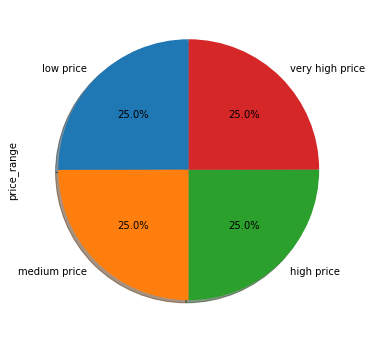

In [ ]:
# Chart - 1 visualization code
#Plotting Pie Chart to show the distribution of Mobile Phones in different price range
print(df.price_range.value_counts().sort_index())
df.price_range.value_counts().sort_index().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['low price','medium price','high price', 'very high price']
                              )

##### 1. Why did you pick the specific chart?

Pie chart was used to visualize the distribution of the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

The visualization shows that the dataset is perfectly balanced.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart shows that mobiles in all price ranges are in equal demand.The companies can make startegies accordingly.

#### Chart - 2 (UNIVARIATE)

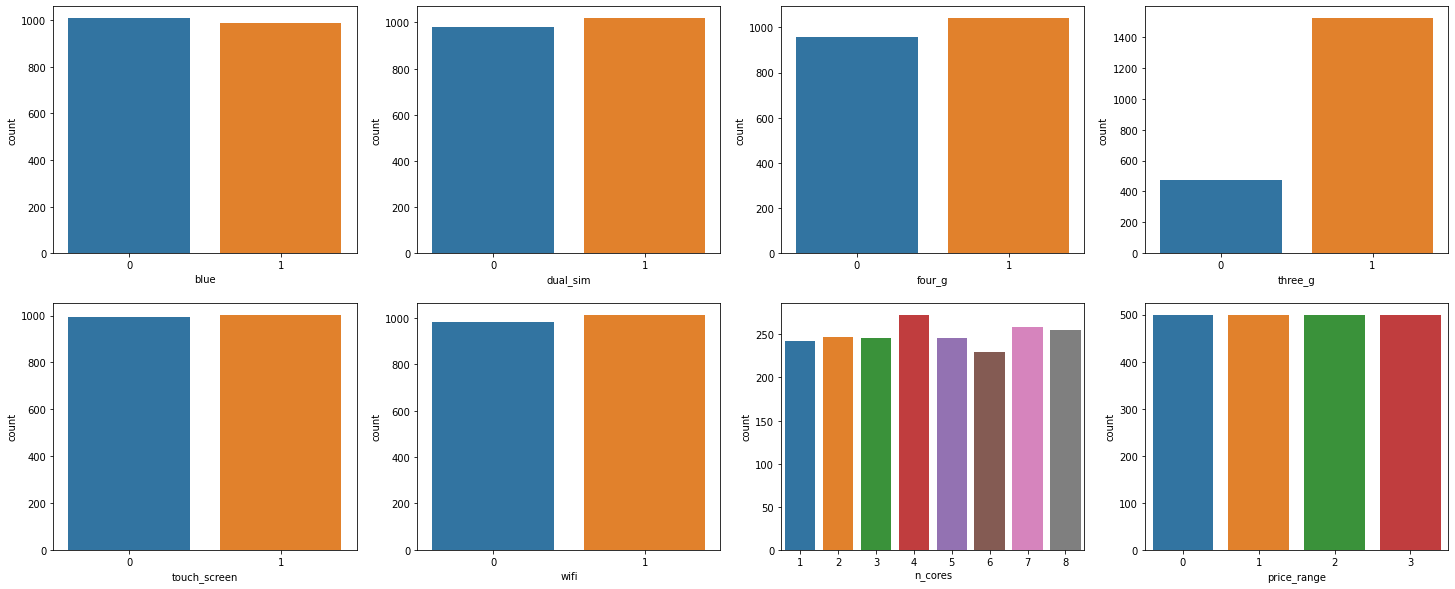

In [ ]:
# Chart 2- visualization code
fig, axs = plt.subplots(2, 4, figsize=(25,10))
for i in range(len(categoricals)):
    sns.countplot(x=df[categoricals[i]], ax=axs[i//4][i%4])
    axs[i//4][i%4].set_ylabel('count')

##### 1. Why did you pick the specific chart?

The barchart was used to check the distribution of each categorical feature.

##### 2. What is/are the insight(s) found from the chart?

It can be very easily observed that every category in all the categorical features has almost equal demand but three_g phones are in significant less demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The dichotomous feature 'three_g' is highly imbalanced which indicates that it might be an important feature to pay attention to.The lack of this feature might be indicating towards low demand of this types of phones in market.

#### Chart - 3 

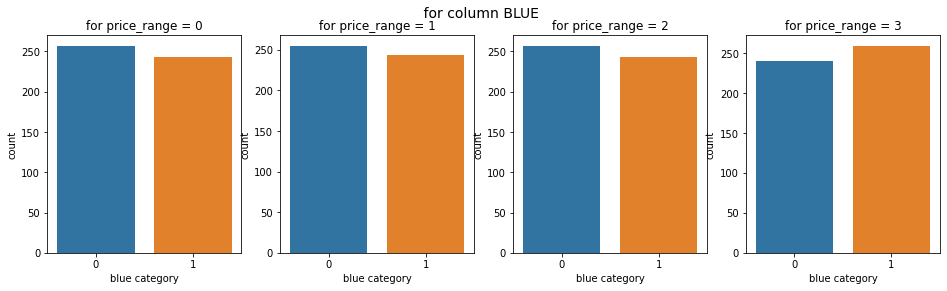



*******************************************************************************************************************************************************




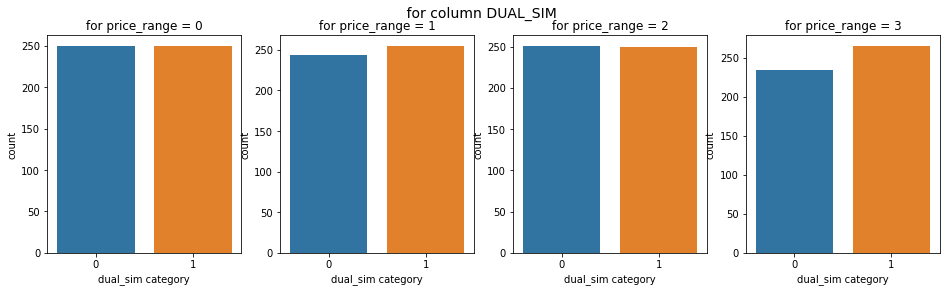



*******************************************************************************************************************************************************




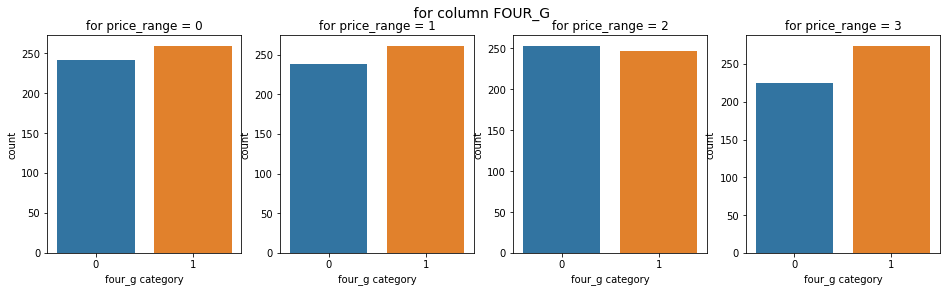



*******************************************************************************************************************************************************




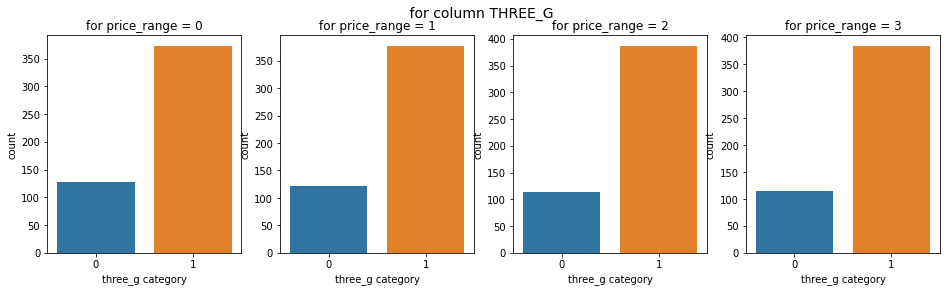



*******************************************************************************************************************************************************




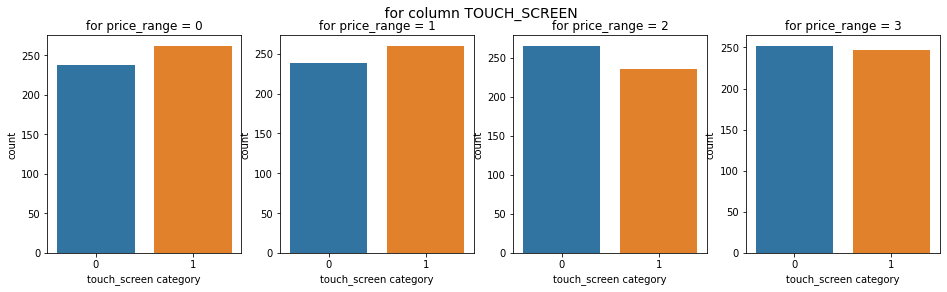



*******************************************************************************************************************************************************




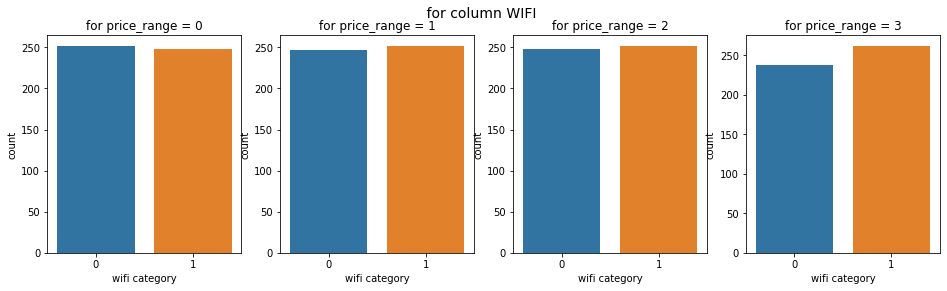



*******************************************************************************************************************************************************




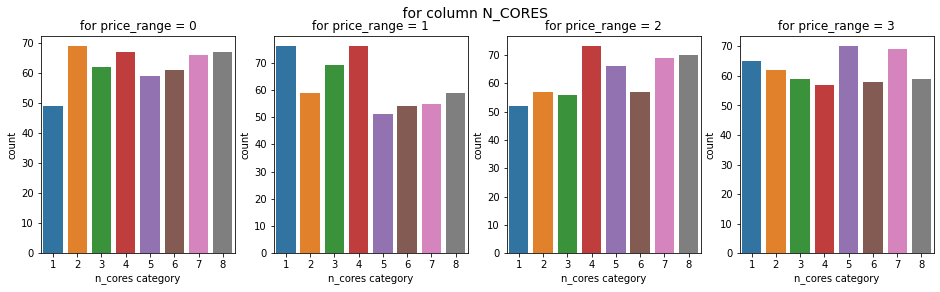



*******************************************************************************************************************************************************




In [ ]:
# Chart - 3 visualization code
# function to plot the distribution of categorical feature for each price range category
def categorical_distribution(column_name):
    fig, axs = plt.subplots(1,4, figsize=(16, 4))
    for i in range(4):
        sns.countplot(x=df[df['price_range']==i][column_name] , ax=axs[i])
        axs[i].set_xlabel(f'{column_name} category')
        axs[i].set_title(f'for price_range = {i}')
    fig.suptitle(f" for column {column_name.upper()}",fontsize = 14)
    plt.show()
#Plotting each categorical columns for each of the four price range
for i in independent_categoricals:
  categorical_distribution(i)
  print('\n\n*******************************************************************************************************************************************************\n\n')

##### 1. Why did you pick the specific chart?

The chart was used to get more details about distribution of categories in each categorical variable in all the four price range.

##### 2. What is/are the insight(s) found from the chart?

The demand for 3g phones is very less in every price segment and less number of phones with more than four cores are available in low cost or second  price segment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Mobile manufacturer should consider providing more than four  cores in medium price range(price range 1) as such phones are less in medium price range.

#### Chart - 4 (UNIVARIATE)

In [ ]:
# Chart - 4 visualization code

<AxesSubplot:ylabel='network_type'>

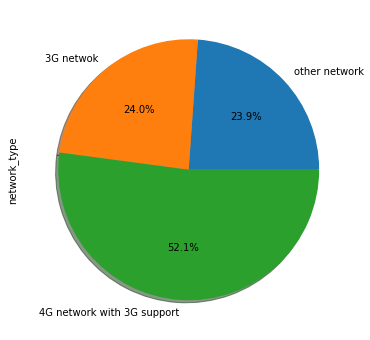

In [ ]:
#Visualizing the distribution of  network support of mobile phones
df['network_type'].value_counts().sort_index().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               shadow=True,
                               labels=['other network','3G netwok','4G network with 3G support']
                              )

##### 1. Why did you pick the specific chart?

The pie chart is used to visualise the distribution of different types of network support in mobiles.

##### 2. What is/are the insight(s) found from the chart?

The mobiles which supports both 3g and 4g networks covers half of the market.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The companies should focus more upon the phones providing both 3g and 4g network in phones as it seems to be more preferred in market.

#### Chart - 5 (BIVARIATE)

<AxesSubplot:xlabel='network_type', ylabel='count'>

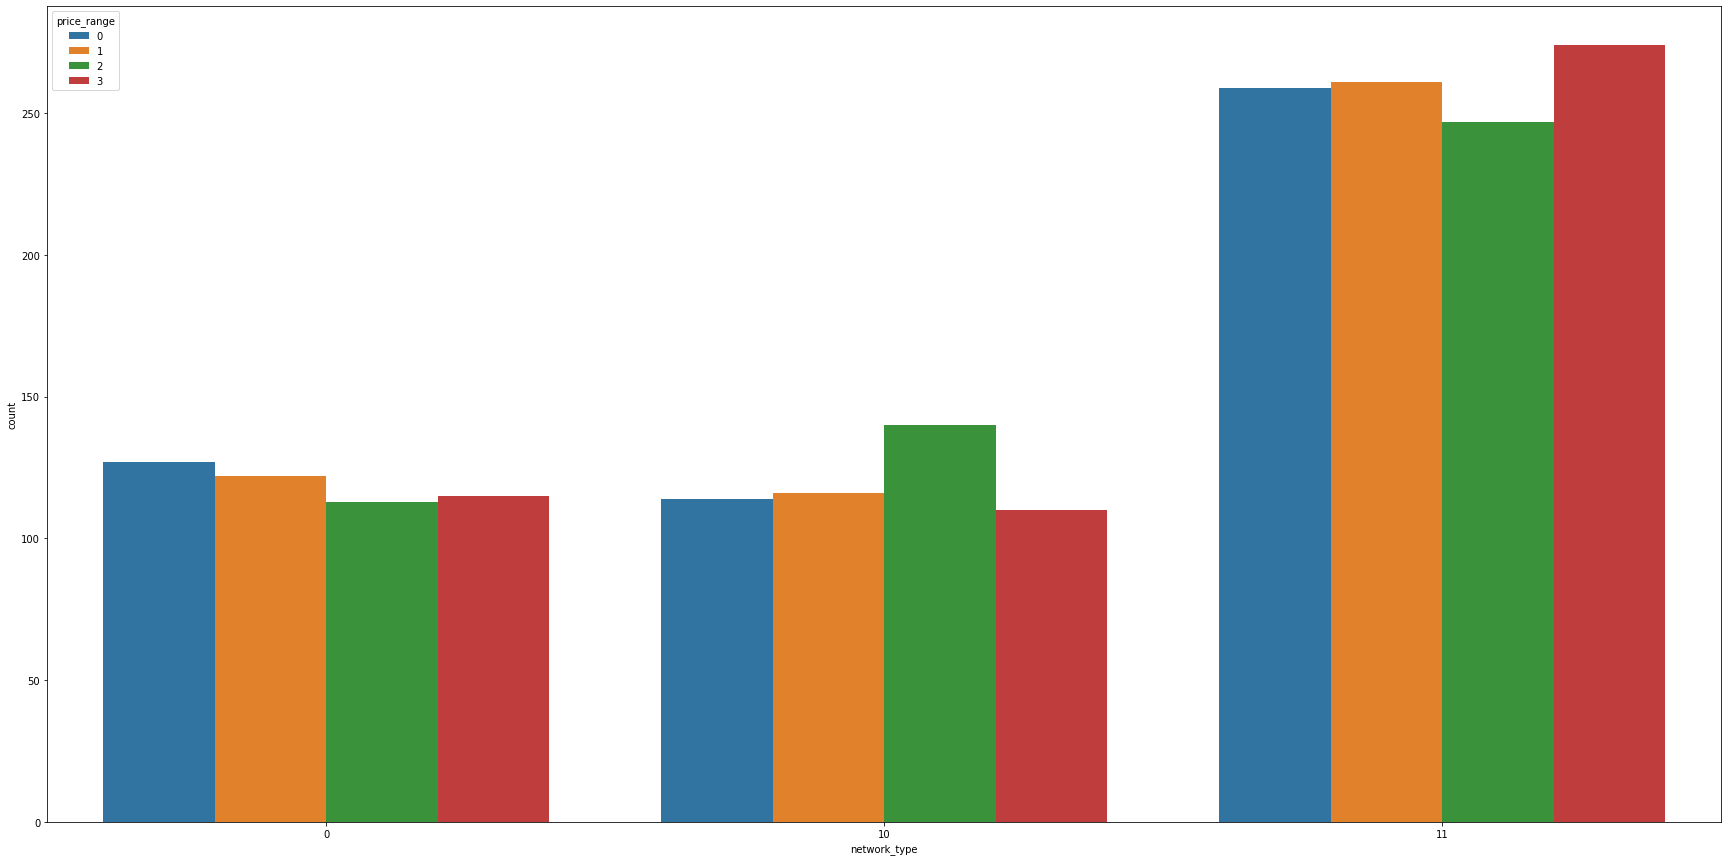

In [ ]:
# Chart - 5 visualization code
#Barchart showing distribution of the different type of network in mobile phones according to price range.
plt.figure(figsize=(30,15))
sns.countplot( df.network_type, hue =df['price_range'] )

##### 1. Why did you pick the specific chart?

The barchart shows distribution of the different type of network in mobile phones according to price range.

##### 2. What is/are the insight(s) found from the chart?



1.   Distribution of mobiles with neither of 3g or 4g network is highest in lowest price range and decreases with increase in price 
2.Only 3g support phones are made available more in medium and high cost range
3.4g supported moble is available most in very high cost phones 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Companies can look at how to provide better network features at lower price ranges.

#### Chart - 6 (UNIVARIATE)

In [ ]:
# Chart - 6 visualization code
#Filter the rows having no camera.
df_camera= df[['fc','pc','price_range']]
df_single_camera = df_camera[(df_camera['fc'] ==0 ) & (df_camera['pc'] ==0)]
print(df_single_camera)

      fc  pc  price_range
7      0   0            0
33     0   0            3
52     0   0            3
54     0   0            2
62     0   0            0
...   ..  ..          ...
1906   0   0            1
1911   0   0            0
1931   0   0            1
1968   0   0            0
1993   0   0            3

[101 rows x 3 columns]


<AxesSubplot:ylabel='price_range'>

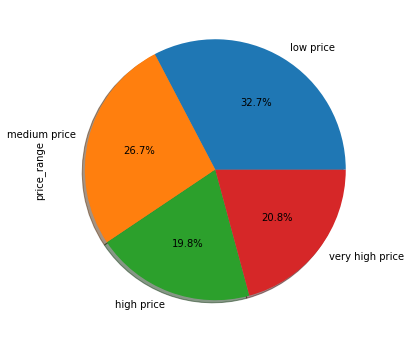

In [ ]:
df_single_camera['price_range'].value_counts().sort_index().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               shadow=True,
                               labels=['low price','medium price','high price', 'very high price']
                              )

##### 1. Why did you pick the specific chart?

To check the distribution of Mobile Phones without camera in every price range.

##### 2. What is/are the insight(s) found from the chart?

Most of the phones with no camera are mostly of the low and medium  price category

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Camera is a very important requirement so not providing even one camera will affect sale s of mobiles negatively.

#### Chart - 7 (BIVARIATE)

<AxesSubplot:xlabel='no_of_features', ylabel='count'>

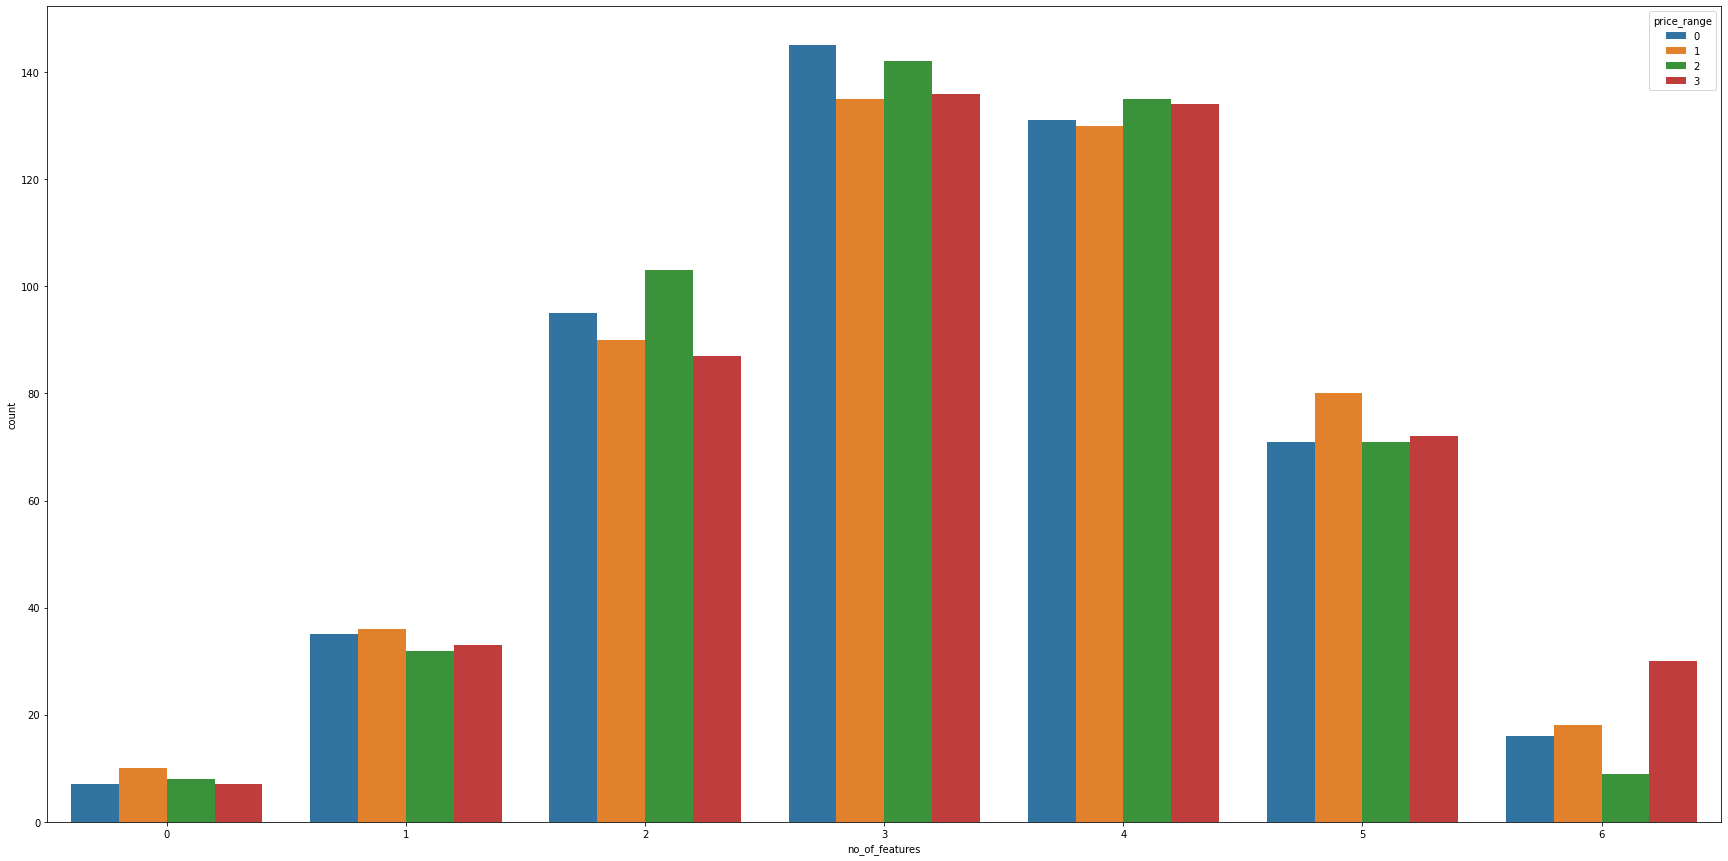

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(30,15))
sns.countplot(df_binary.no_of_features, hue = df['price_range'])

##### 1. Why did you pick the specific chart?

The barchart shows the distribution of mobile phones available according to the number of binary features available in every price range

##### 2. What is/are the insight(s) found from the chart?


*   Most of the mobiles in every price range has three to four features.
*   In mobiles with all the six features available the quantity of costly phones is maximum




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Phones with too less or too much features are in less demand so company should focus on phones with two to five features, especially  when not making very high cost phones.

#### Chart - 8 (BIVARIATE)

<AxesSubplot:xlabel='clock_speed', ylabel='count'>

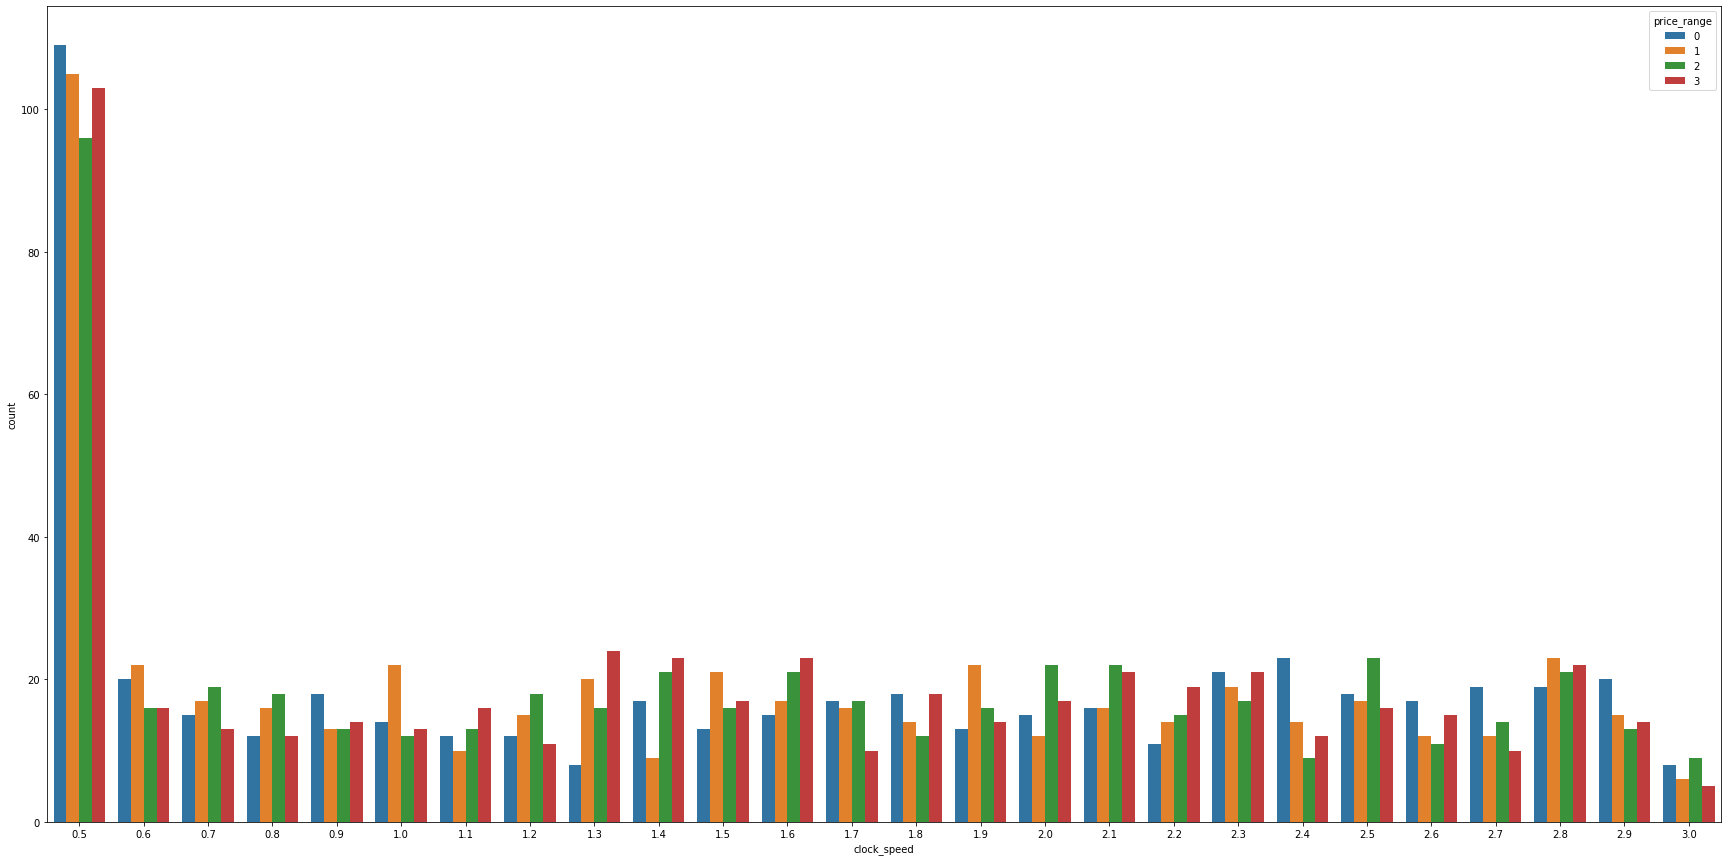

In [ ]:
# Chart - 8 visualization code
#Barplot to analyze the effect of clock speed on price range
plt.figure(figsize=(30,15))
sns.countplot(df['clock_speed'] , hue = df.price_range)

##### 1. Why did you pick the specific chart?

To analyze the effect of clock speed on price range

##### 2. What is/are the insight(s) found from the chart?

There is no clear correlation between clock speed and price range

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative insight

#### Chart - 9 (UNIVARIATE)

<AxesSubplot:xlabel='combined_power', ylabel='Density'>

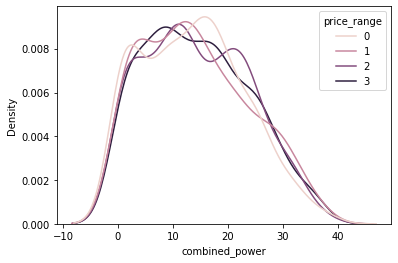

In [ ]:
# Chart - 9 visualization code
#KDE Plot to visualize distribution of the sum of primary and front camera
sns.kdeplot(data=df_combined_camera_powers, x='combined_power', hue='price_range')

##### 1. Why did you pick the specific chart?

The KDE plot gives the distribution of combined power of Mobile phone's primary and front camera.

##### 2. What is/are the insight(s) found from the chart?

The distribution is almost same across every price range.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The combined power of front and primary camera does not affects the price range much . There is no negative insight.

#### Chart - 10 (UNIVARIATE)

    Distribution Plot of battery_power 



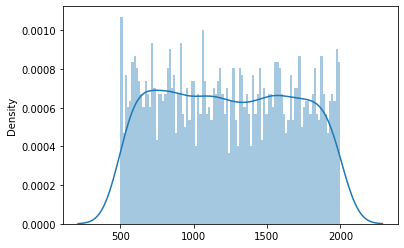

    Distribution Plot of clock_speed 



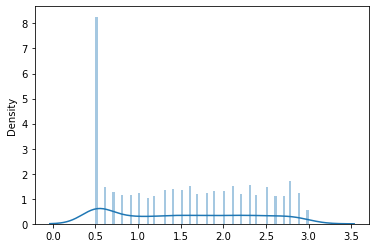

    Distribution Plot of fc 



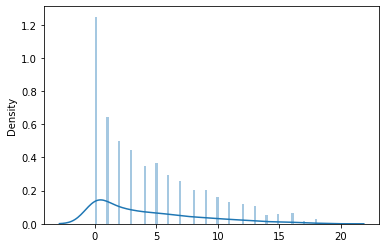

    Distribution Plot of int_memory 



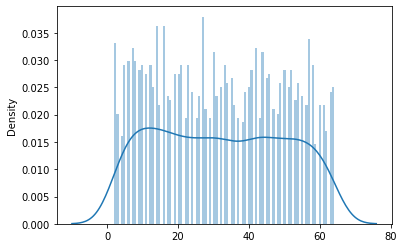

    Distribution Plot of m_dep 



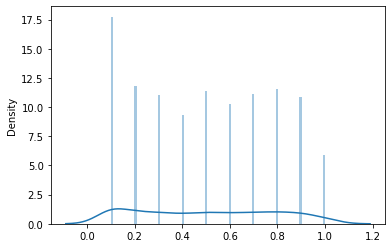

    Distribution Plot of mobile_wt 



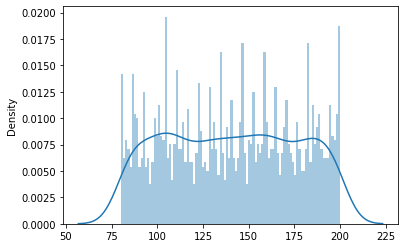

    Distribution Plot of pc 



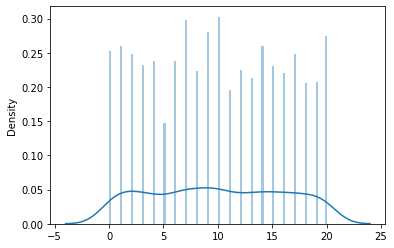

    Distribution Plot of pixels 



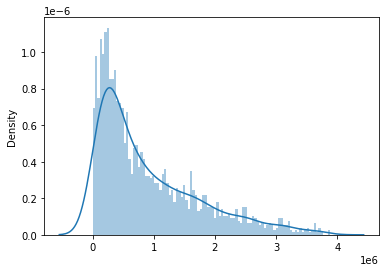

    Distribution Plot of ram 



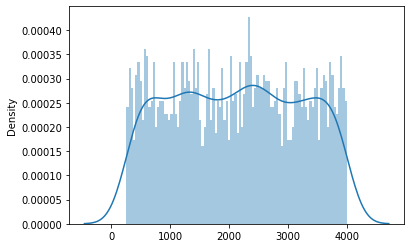

    Distribution Plot of talk_time 



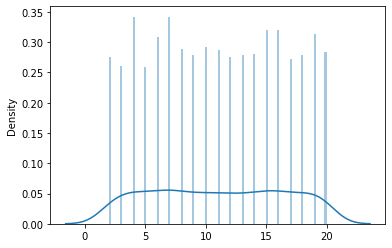

    Distribution Plot of screen_size 



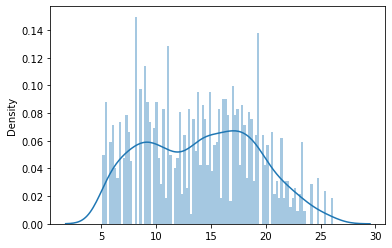

In [ ]:
# Chart - 10 visualization code
#Plotting the Distribution Plot of the Numerical features
for col in numerical:
  sns.distplot(x = df[col] , bins = 100)
  print(f"    Distribution Plot of {col} \n")
  plt.show()

##### 1. Why did you pick the specific chart?

The distribution plot is used to check the distribution of the numerical features.

##### 2. What is/are the insight(s) found from the chart?

The distributionj plots helps us to understand the distribution of data for the numerical features.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are no negative insights.

#### Chart - 11 (BIVARIATE)

In [ ]:
# Chart - 11 visualization code
#Barplot of mean of numerical features and price_range
xy = df.groupby('price_range')[numerical].mean()


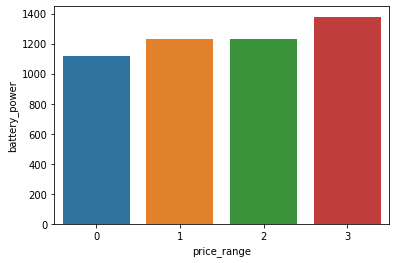

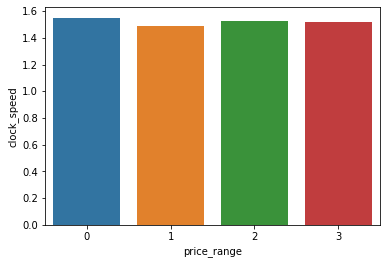

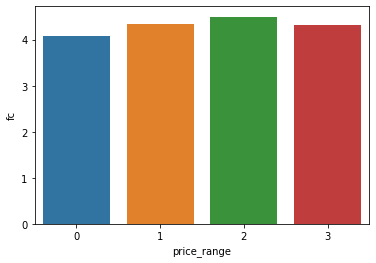

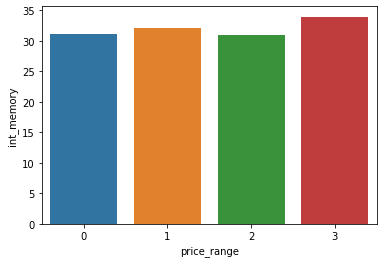

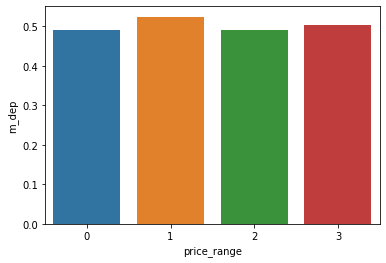

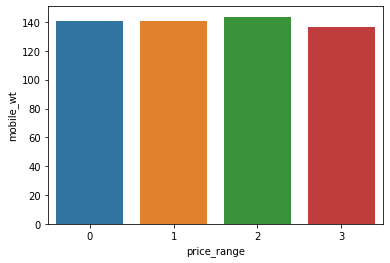

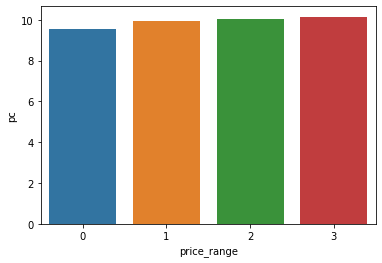

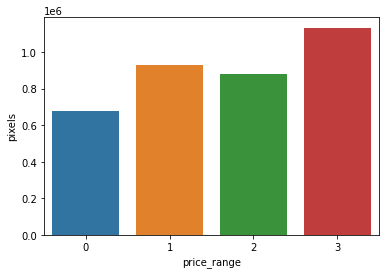

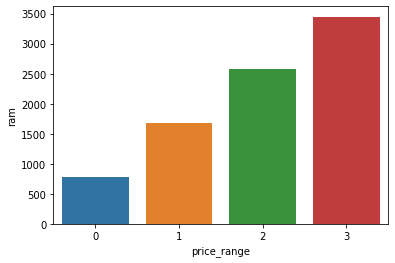

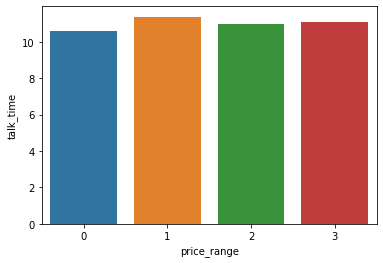

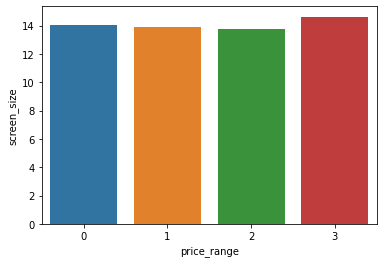

In [ ]:
for i in numerical:
  sns.barplot(y = xy[i], x = xy.index)
  plt.show()

##### 1. Why did you pick the specific chart?

To check the mean of numerical features in every price range.

##### 2. What is/are the insight(s) found from the chart?

The lower price range ram average is lower and the ram average increase as the price range increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company should try to provide more RAM in phones to get a better price.

#### Chart - 12 (BIVARIATE)

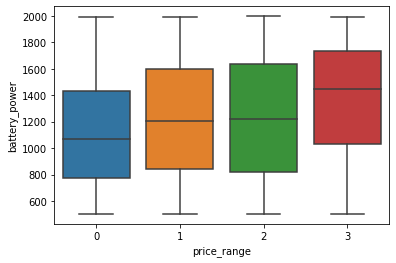



*******************************************************




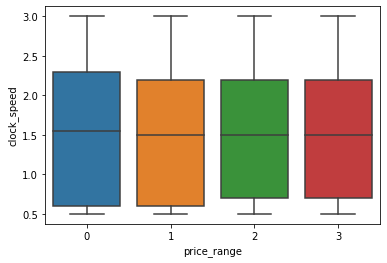



*******************************************************




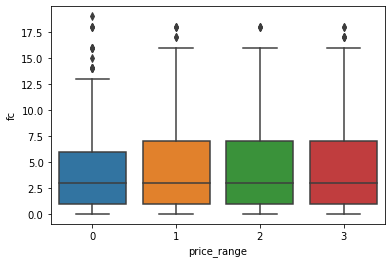



*******************************************************




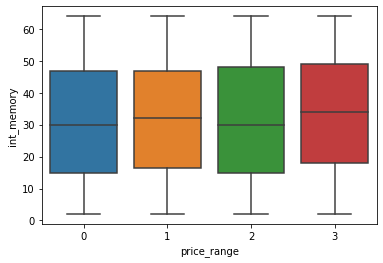



*******************************************************




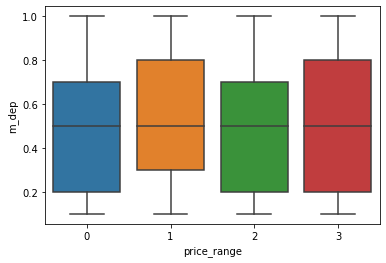



*******************************************************




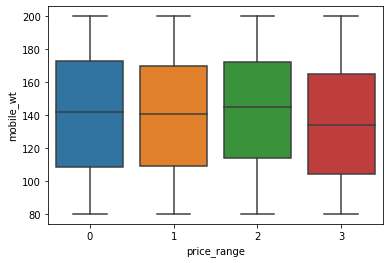



*******************************************************




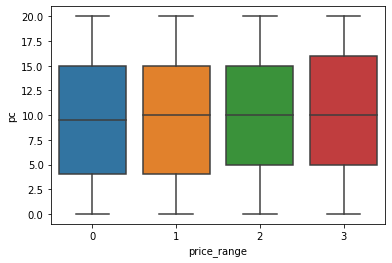



*******************************************************




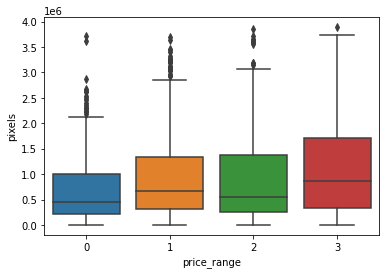



*******************************************************




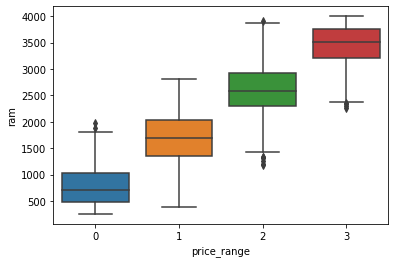



*******************************************************




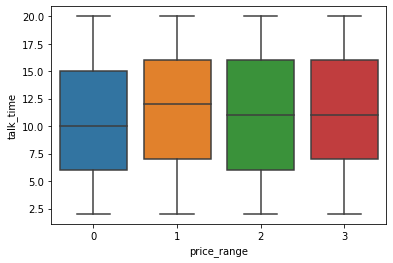



*******************************************************




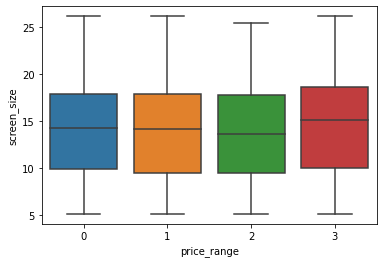



*******************************************************




In [ ]:
# Chart - 12 visualization code
#Function to plot Box plot for each price range.
def plot_box_plot(column_name):
  sns.boxplot(data=df, x='price_range', y=column_name)
  fig.suptitle("BOXPLOT FOR : " + column_name.upper(),fontsize = 14)
  plt.show()
for i in numerical:
  plot_box_plot(i)
  print('\n\n*******************************************************\n\n')

##### 1. Why did you pick the specific chart?

The boxplot is used to get five number summary of the numeric type data available .The five information we get are the minimum,maximum, median , first quartile and the third quartile

##### 2. What is/are the insight(s) found from the chart?

Quantity of Ram and Battery Power affects the price range positively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Providing good quantity of ram and battery power will help getting good price from customers.

#### Chart - 13 (BIVARIATE)

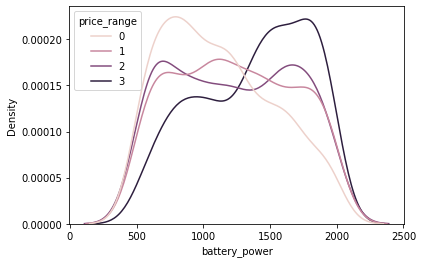



*******************************************************




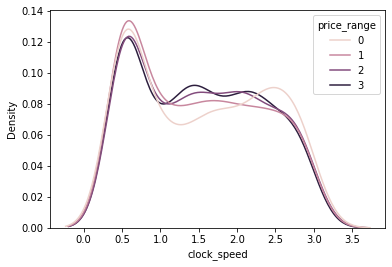



*******************************************************




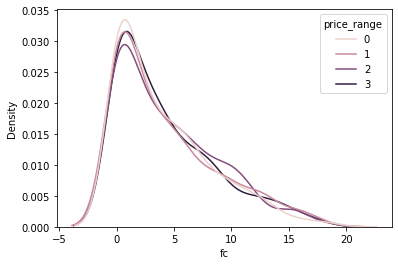



*******************************************************




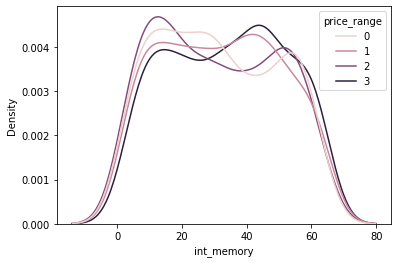



*******************************************************




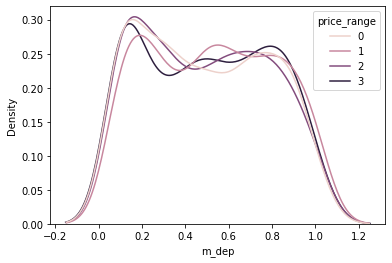



*******************************************************




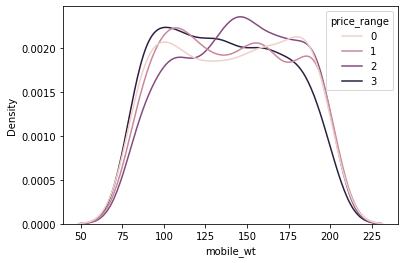



*******************************************************




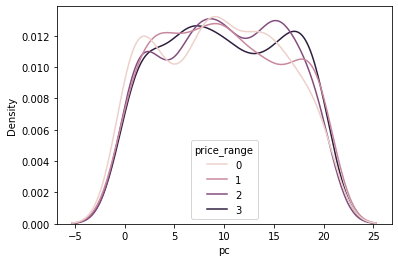



*******************************************************




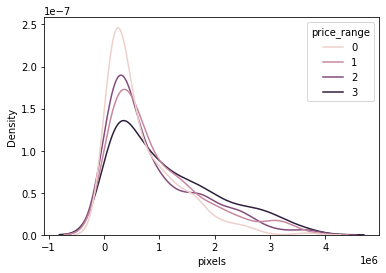



*******************************************************




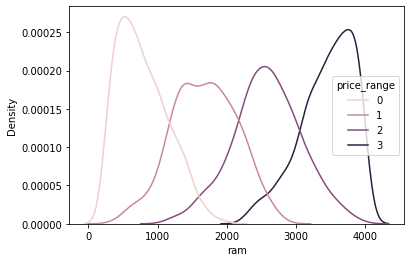



*******************************************************




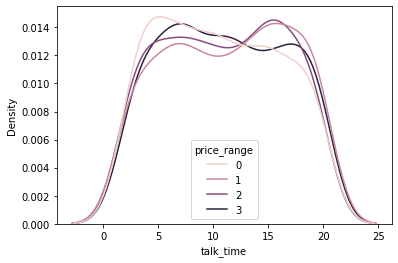



*******************************************************




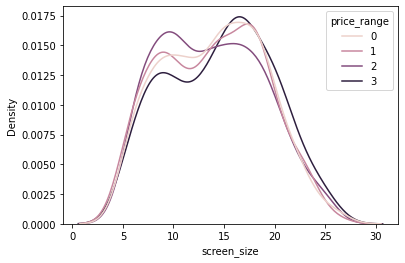



*******************************************************




In [ ]:
# Chart - 13 visualization code
#Function to plot KDE plot with for each price range.
def plot_kdeplot(column_name):
  sns.kdeplot(data=df, x=column_name, hue='price_range')
  fig.suptitle("KDE PLOT FOR : " + column_name.upper(),fontsize = 14)
  plt.show()
for i in numerical:
  plot_kdeplot(i)
  print('\n\n*******************************************************\n\n')

##### 1. Why did you pick the specific chart?

To view the effect of distribution of numerical features across different price range.

##### 2. What is/are the insight(s) found from the chart?

Ram and Battery Power affects the price range postively

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Providing good quantity of ram and battery power will help getting good price from customers.

#### Chart - 14 - Correlation Heatmap (MULTIVARIATE)

<AxesSubplot:>

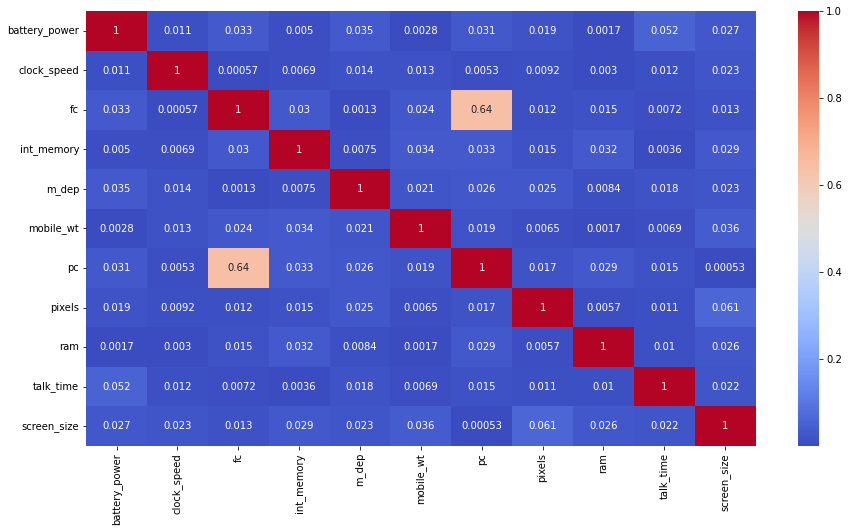

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
correlation = df[numerical].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

The correlation chart shows the correlation between the numerical  variables

##### 2. What is/are the insight(s) found from the chart?

The primary camera and the front camera quality are correlated .

#### Chart - 15 - Pair Plot (MULTIVARIATE)

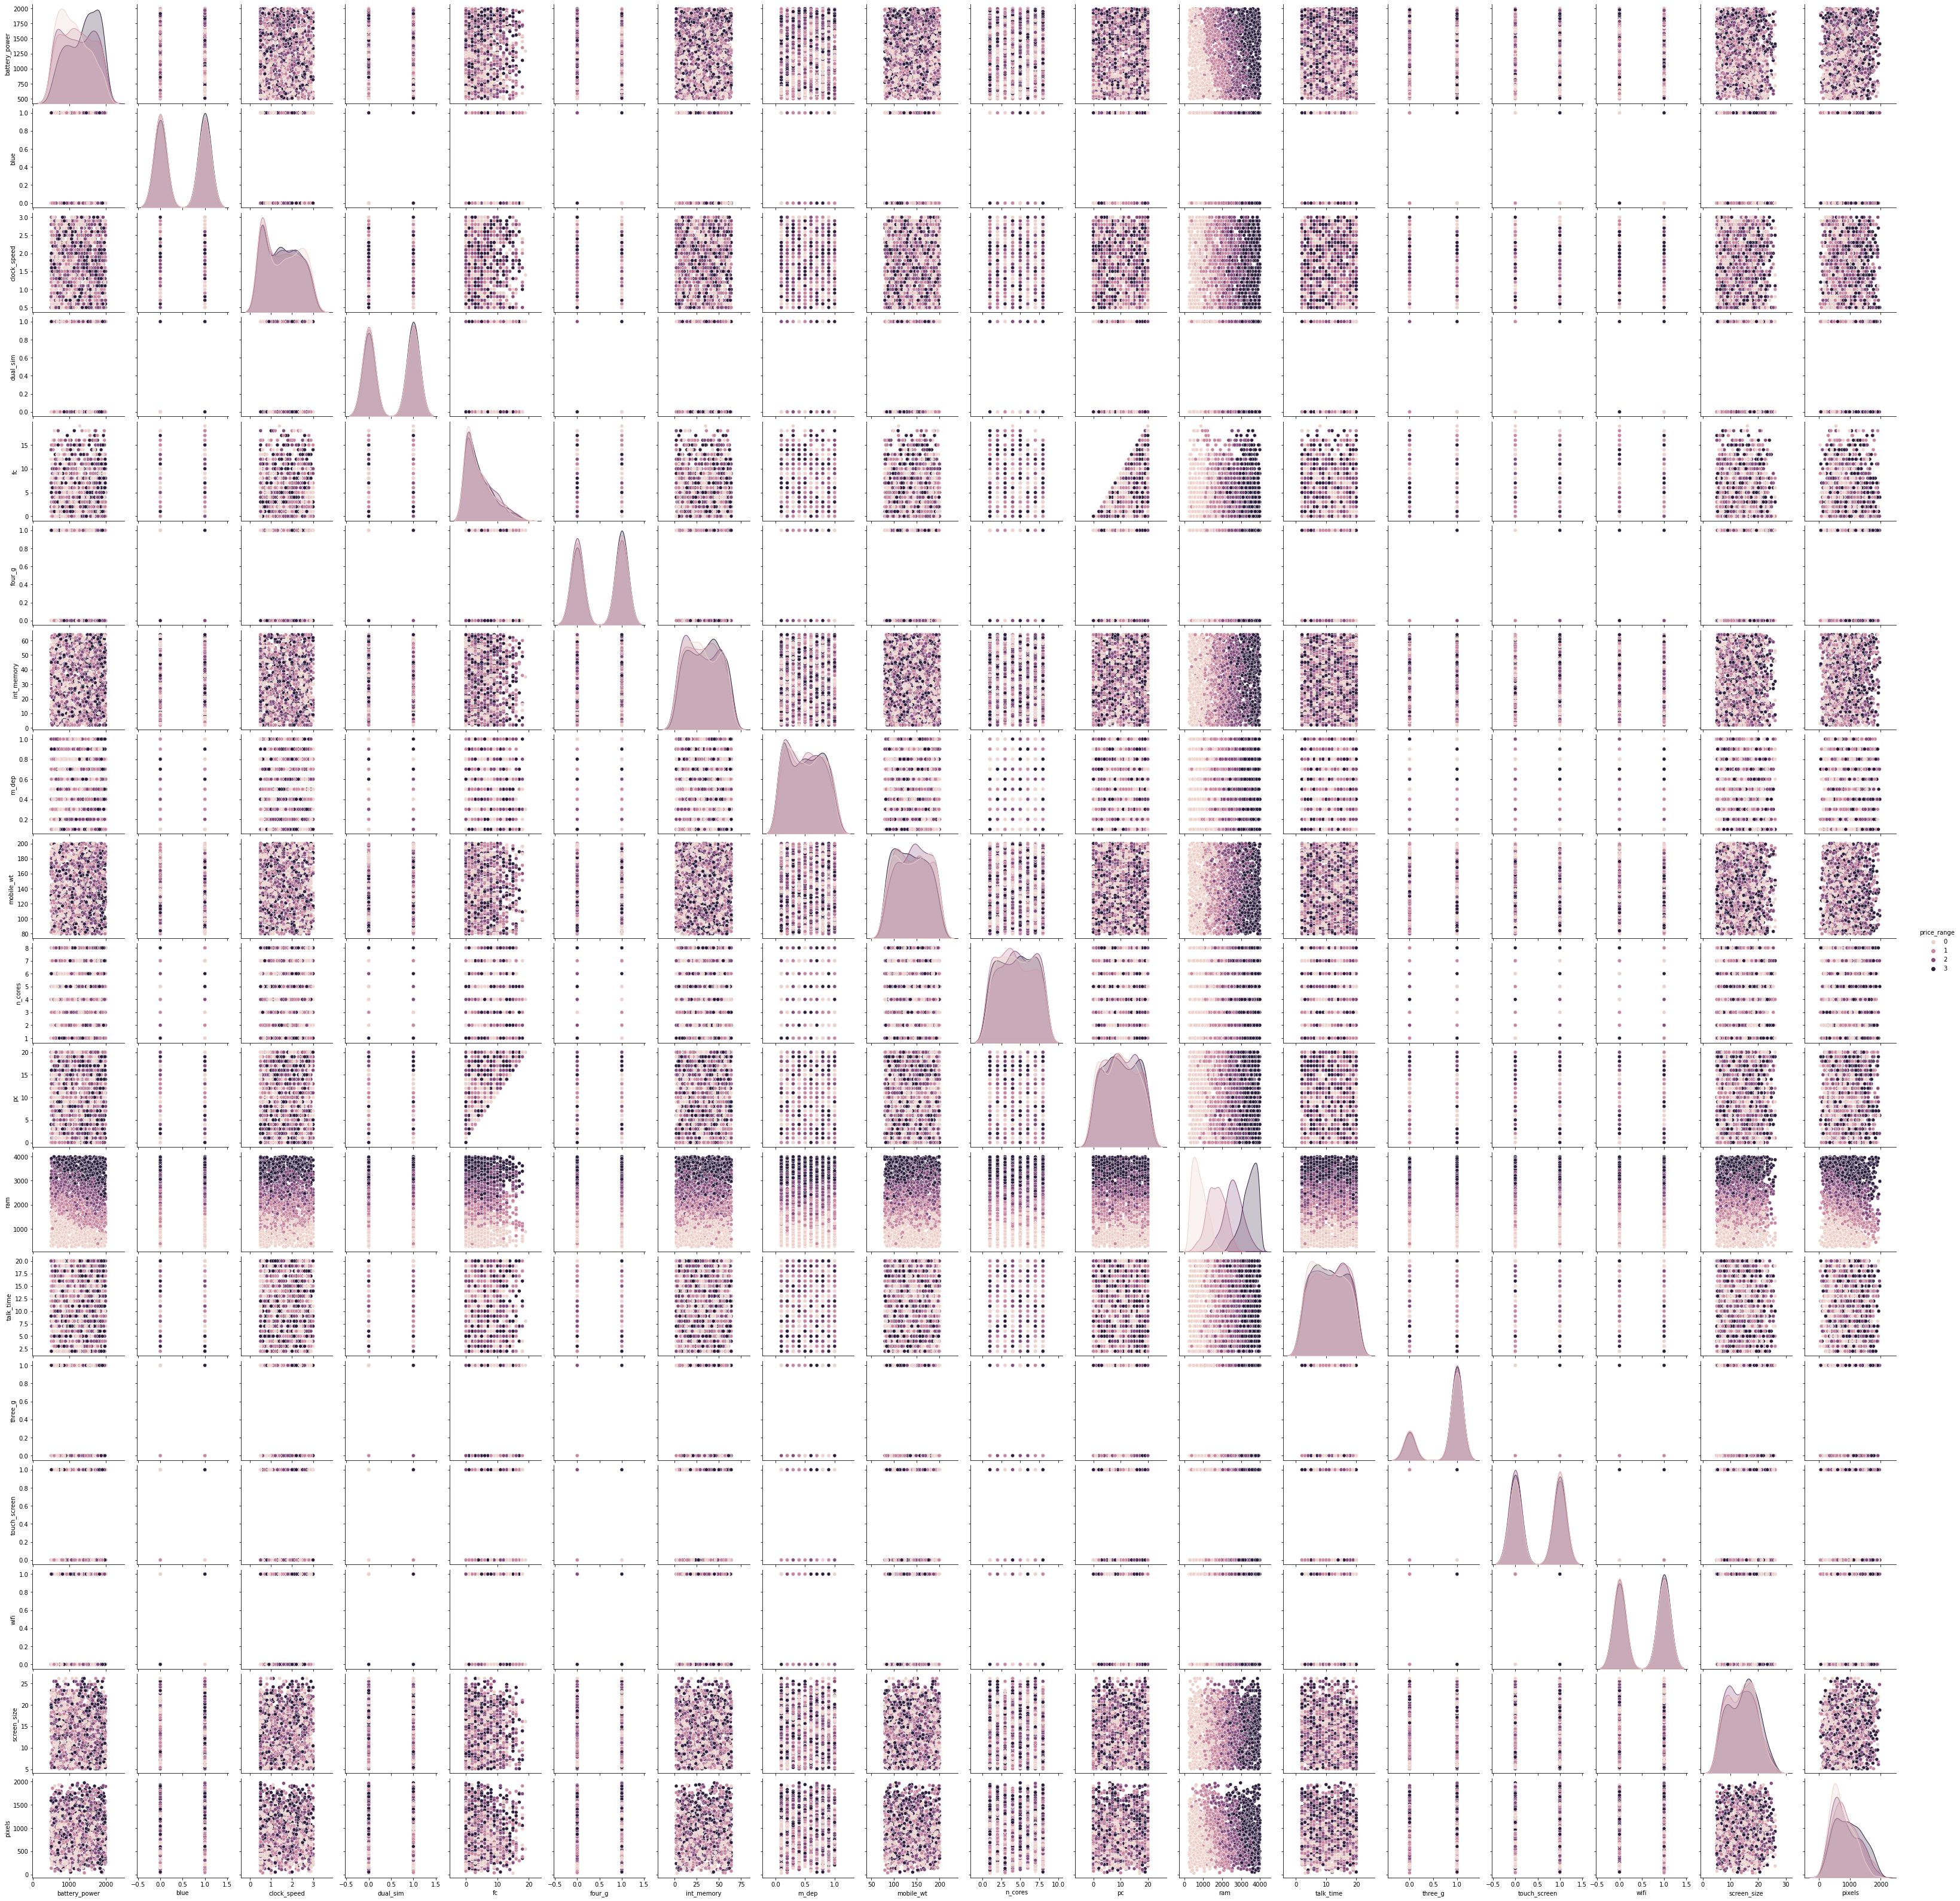

In [ ]:
#Pair Plot visualization code
sns.pairplot(df, hue="price_range")

##### 1. Why did you pick the specific chart?

Pairplot helps us visualise relations between variables pairwise

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



*   Mobiles in price range 2(high cost) has average RAM of atleast 800 mb
*   Mobiles in price range 2(high cost) has average primary camera of atmost 8 megapixel.
*  Mobiles have average talktime of  11 hours


In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

Mobiles in price range 2(high cost) has average RAM of atleast 800 mb

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis = 800

Alternative Hypothesis : N < 800

Test Type : Left tailed test




#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1 = df[df.price_range ==2 ]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 800
sample_mean = hypo_1["ram"].mean()
size = len(hypo_1)
std=(variance(hypo_1["ram"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="ram")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 1.0.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and failed to reject the null hypothesis that Mobiles in price range 0(low cost) has average RAM of atleast 800 mb.

##### Why did you choose the specific statistical test?

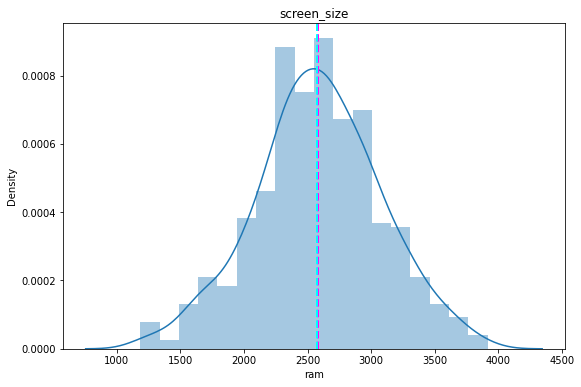

In [ ]:
# Visualizing code of histogram plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["ram"])
sns.distplot(hypo_1["ram"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2

 Mobiles in price range 2(high cost) has average of atmost 8 megapixels

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : N = 8

Alternate Hypothesis : N > 8

Test Type : Right Tailed Test



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1 = df[df.price_range ==2 ]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 8
sample_mean = hypo_1["pc"].mean()
size = len(hypo_1)
std=(variance(hypo_1["pc"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="pc")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.7208456881689926e-14


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as a statistical testing and the Null Hypothesis has been rejected successfully. The Null Hypothesis was that  mobiles in price range 2(high cost) has average primary camera of atmost 8 megapixel.

##### Why did you choose the specific statistical test?

In [ ]:
print(df[df.price_range ==2]["pc"].mean() - df[df.price_range ==1 ]["pc"].median())

0.018000000000000682


It can be observed that the difference in the sample mean and sample median is extremely close to zero a Z test is suitable for this condition.

Answer Here.

### Hypothetical Statement - 3

Mobiles have average talktime of  11 hours

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : N = 11

Alternate Hypothesis : N!=11

Test Type :Double tailed test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1 = df
# Getting the required parameter values for hypothesis testing
hypothesis_number = 11
sample_mean = hypo_1['talk_time'].mean()
size = len(hypo_1)
std=(variance(hypo_1['talk_time']))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='d',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="talk_time")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 2.220446049250313e-16


##### Which statistical test have you done to obtain P-Value?

I have performed a Z-test for statistical testing and failed to reject the Null Hypothesis that mobiles have average talktime of 11 hours

##### Why did you choose the specific statistical test?

In [ ]:
#Finding difference between mean and median of the sample used.
print(df["talk_time"].mean() - df["talk_time"].median())

0.01051051051051033


It can be observed that the difference in the sample mean and sample median is extremely close to zero so a Z test is suitable for this condition.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

Text(0.5, 1.0, ' Visualising Missing Values')

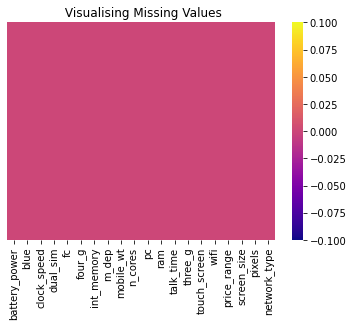

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values so no imputation needed.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

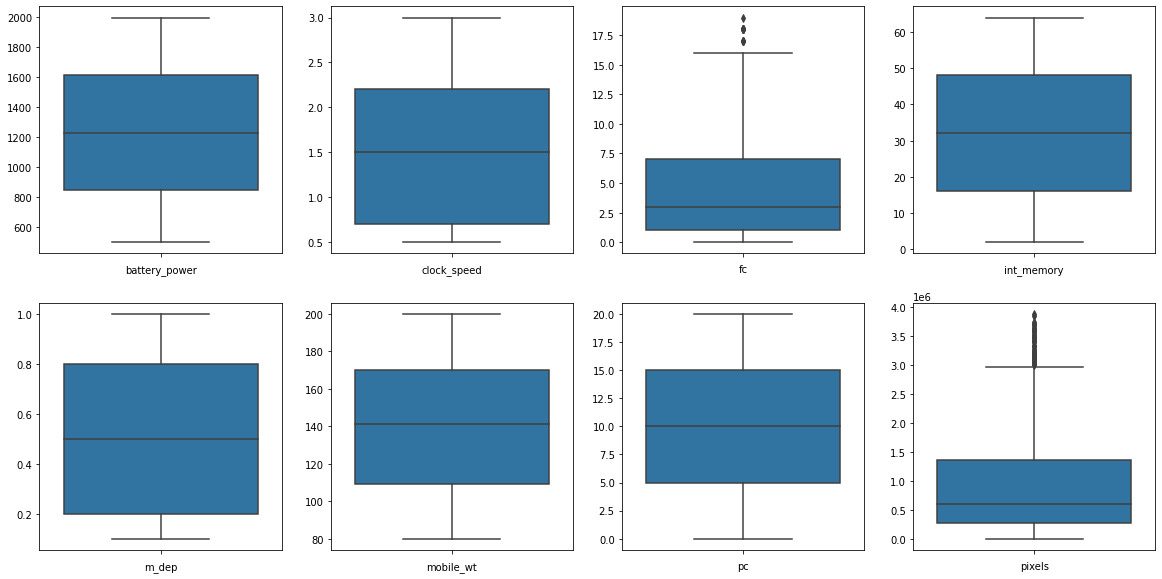

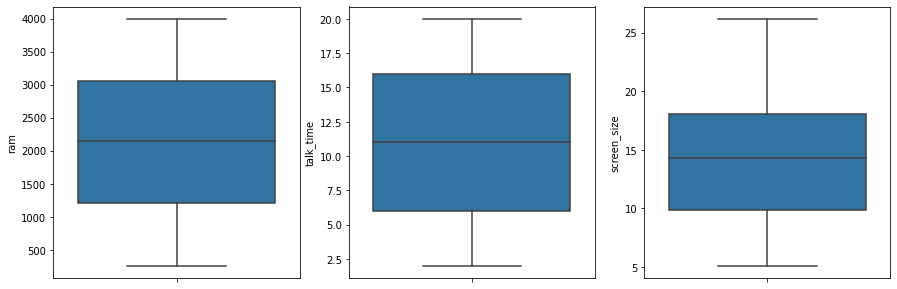

In [ ]:
#Creating boxplot for each numerical variable for outlier analysis.
fig, axs = plt.subplots(2,4, figsize=(20,10))
for i in range(8):
    sns.boxplot(y =df[numerical[i]], ax=axs[i//4][i%4])
    axs[i//4][i%4].set_xlabel(numerical[i])
    axs[i//4][i%4].set_ylabel('')
fig, axs = plt.subplots(1,3, figsize=(15,5))
for k in range(8,len(numerical)):
  sns.boxplot(y = df[numerical[k]],ax = axs[k-8])
plt.show()


In [ ]:
#Applying SquareRoot to 'pixels' column and 'fc' to remove outliers
df['pixels'] = df['pixels']**0.5
df['fc'] = df['fc']**0.5

<AxesSubplot:ylabel='pixels'>

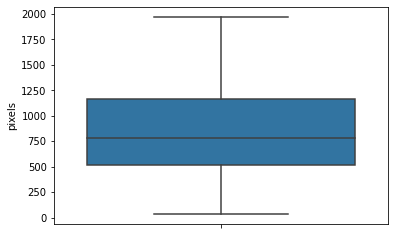

In [ ]:
sns.boxplot(y = df['pixels'])

<AxesSubplot:ylabel='fc'>

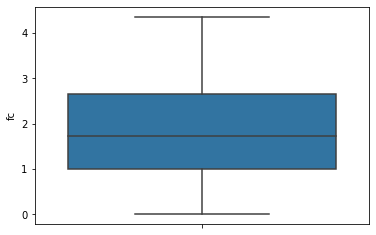

In [ ]:
sns.boxplot(y = df['fc'])

##### What all outlier treatment techniques have you used and why did you use those techniques?
The column 'pixels' and 'fc' had outliers which was removed by applying Square Rooot to the values of 'pixels' column. The boxplot obtained after applying Square Root shows that the outliers have been removed after treatment.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

As all the categorical columns are already in numerical format in the dataset so encoding in not needed.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
df.drop(['network_type'], axis=1 ,inplace=True)

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
dependent_variable = 'price_range'
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
# Create the data of independent variables
x = df[independent_variables].values
# Create the dependent variable data
y = df[dependent_variable].values

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)

##### What data splitting ratio have you used and why? 

80% data for train set and 20% for test set as it will be suitable to have enough data to train and ensure by test data that there is no overfitting.Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is balanced

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

## Functions to evaluate model performance and for visualizing Feature Importance

In [ ]:
#Function to give metrics like accuracy, precision , recall,f1scoe , support and plots confusion matrix of model used.
def model_asses(act,pred):
  print(classification_report(act, pred))
  #plot_confusion_matrix(clsr, x, y)
  cm = confusion_matrix(act,pred)
  cm_df = pd.DataFrame(cm)
  sns.heatmap(cm_df, annot=True)
  plt.title('Confusion Matrix')
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()

In [ ]:
#Function to show the feature importance of model used
def feature_importance(clsr) :
  feature_importance = pd.DataFrame({'Feature':df[independent_variables].columns,
                                 'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
  fig, ax = plt.subplots(figsize=(15,8))
  ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.ensemble import GradientBoostingClassifier
clsr_gb = GradientBoostingClassifier()
# Fit the Algorithm
clsr_gb.fit(x_train, y_train)
# Predict on the model
#Getting Predictions for train set
y_train_pred = clsr_gb.predict(x_train)
#Getting predictions fror test set
y_test_pred = clsr_gb.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       411
           2       1.00      0.99      1.00       392
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598



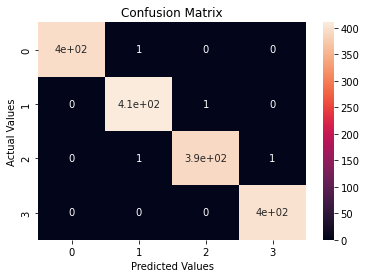

In [ ]:
# Visualizing evaluation Metric Score chart
#Evaluation for train Set
model_asses(y_train ,y_train_pred)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       104
           1       0.83      0.90      0.86        88
           2       0.91      0.84      0.87       108
           3       0.93      0.95      0.94       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



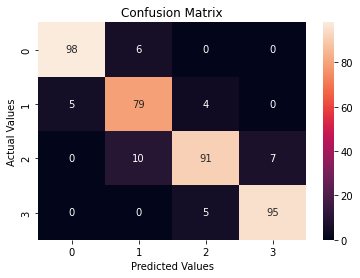

In [ ]:
#Evaluation on test set
model_asses(y_test , y_test_pred)

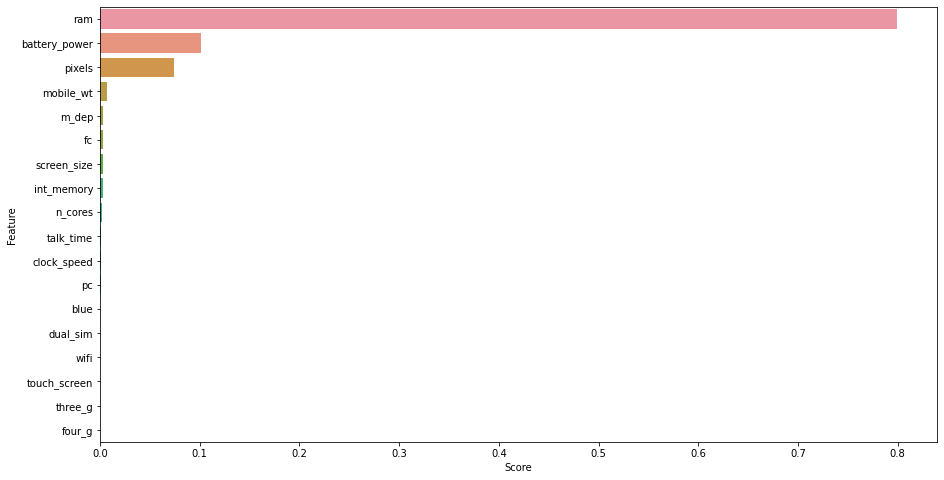

In [ ]:
#Feature importance using Gradient Boosting Classifier
feature_importance(clsr_gb)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'n_estimators':[50,100,200,300],
          'max_depth':[3,5,8,10],
          'learning_rate':[0.25,0.5,1],
          }
gb = GradientBoostingClassifier()
clsr = GridSearchCV(gb, params, cv=2)
# Fit the Algorithm
clsr.fit(x_train,y_train)
# Predict on the model
#Getting predictions on the test set through the optimized model
test_pred = clsr.predict(x_test)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       104
           1       0.84      0.91      0.87        88
           2       0.89      0.79      0.83       108
           3       0.88      0.94      0.91       100

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.89       400



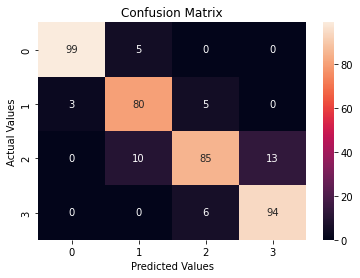

In [ ]:
#Getting metrics for the optimized model
#getting metrics for the test set 
model_asses(y_test,test_pred)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV method has been used for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Using hyperparameter optimization by GridSearchCV accuracy of 90 percent is obtained but by using default parameters for the GradientBoosting algorithm a better accuracy of 91 percent is obtained.

### ML Model - 2

In [ ]:
#ML Model - 2 Implementation
from sklearn.ensemble import RandomForestClassifier
clsr_rf = RandomForestClassifier()
# Fit the Algorithm
clsr_rf.fit(x_train,y_train)
# Predict on the model
#Storing Predictions on train set
y_pred_train = clsr_rf.predict(x_train)
#Storing predictions on test set
y_pred_test = clsr_rf.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       411
           2       1.00      1.00      1.00       392
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598



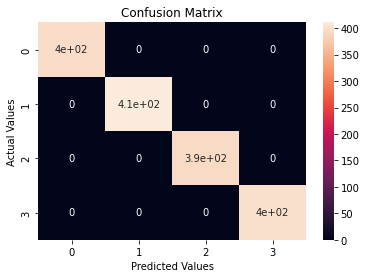

In [ ]:
# Visualizing evaluation Metric Score chart
#Evaluating train set
model_asses(y_train,y_pred_train)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       104
           1       0.79      0.82      0.80        88
           2       0.83      0.77      0.80       108
           3       0.89      0.91      0.90       100

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



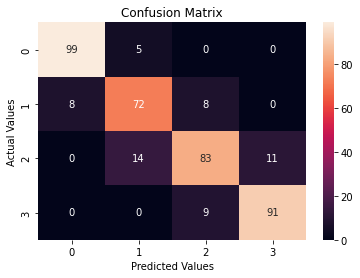

In [ ]:
#Evaluating test set
model_asses(y_test,y_pred_test )

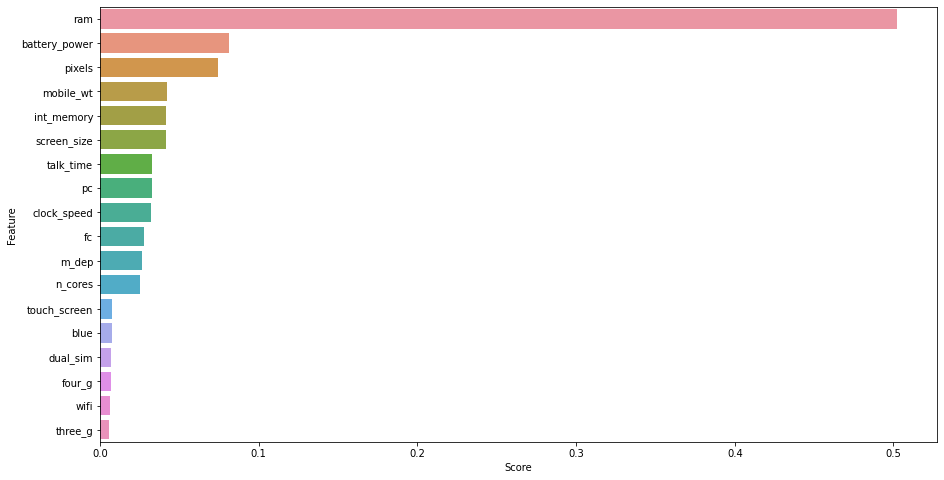

In [ ]:
#Feature importance using Random Forest
feature_importance(clsr_rf)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'n_estimators':[300,400,500,600],
          'max_depth':[None,10,20,30,40],
          'min_samples_split':[2,8],
          'max_leaf_nodes':[None, 20,30,40]
          }
# Fit the Algorithm
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=5)
clsr.fit(x_train,y_train)
# Predict on the model
#Storing the prediction on test set obtained by the optimized model
test_pred = clsr.predict(x_test)

In [ ]:
#Storing the prediction made on test set by the model
y_pred = clsr.predict(x_test)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       104
           1       0.83      0.82      0.82        88
           2       0.84      0.80      0.82       108
           3       0.90      0.91      0.91       100

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.88      0.87       400



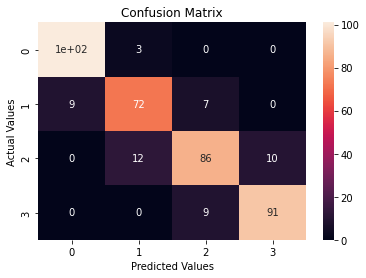

In [ ]:
#Getting metrics for the optimized model
model_asses(y_test,test_pred)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used for Hyper Parameter Optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The hyper parameter optimization was not able to take us beyond the accuracy of 88 percent obtained without optimization.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(n_estimators = 250)
# Fit the Algorithm
xgb.fit(x_train,y_train)
# Predict on the model
#Storing the prediction on train set
y_pred_train = xgb.predict(x_train)
#Storing prediction on test set
y_pred_test = xgb.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       411
           2       1.00      1.00      1.00       392
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598



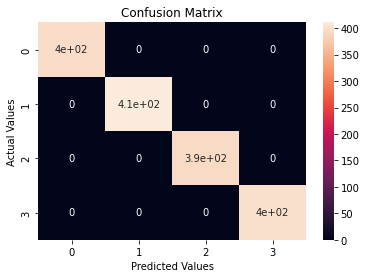

In [ ]:
# Visualizing evaluation Metric Score chart
#Evaluating train set
model_asses(y_train,y_pred_train )

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       104
           1       0.86      0.89      0.87        88
           2       0.90      0.82      0.86       108
           3       0.91      0.96      0.93       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



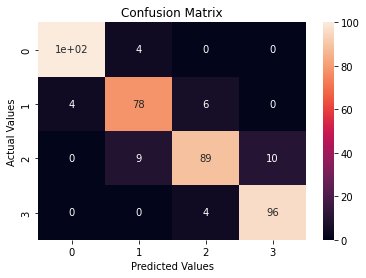

In [ ]:
#Evaluating test set
model_asses(y_test,y_pred_test )

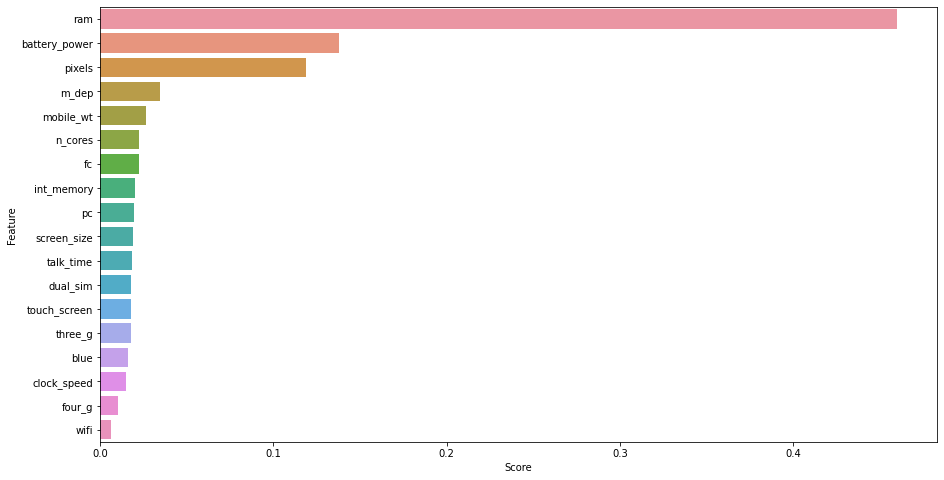

In [ ]:
#Feature importance using XGB Classifier.
feature_importance(xgb)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy score has been used to choose the best model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I will choose XGB classifier beacsue it gives the maximum accuracy amongst the models used.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

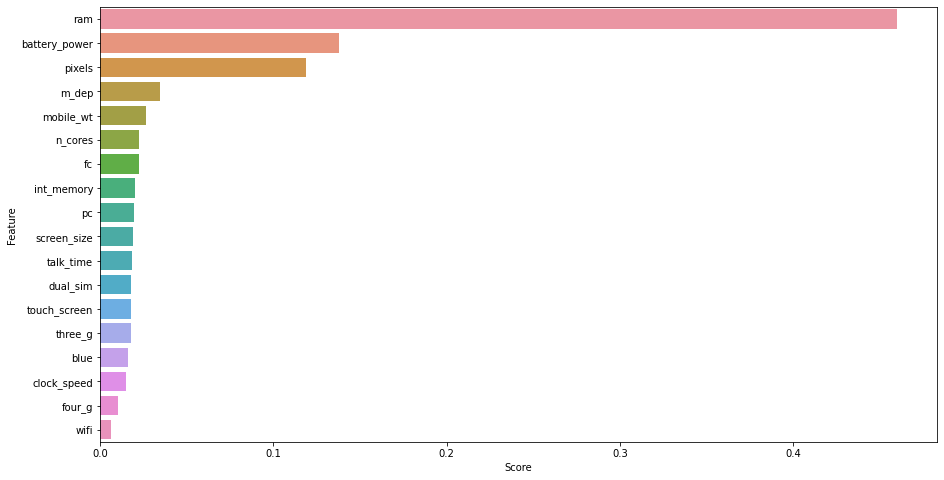

In [ ]:
#Feature Importance plot of XG Boost Classifier model
feature_importance(xgb)

The Feature Importance plot shows the importance of features for xgb classifier model in descending order.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* The four price range has similar number of phones 
* There are very less number of phones without 3g features
* Almost half of the phones available supports both 3g and 4g network
* Phones with neither 4g nor 3g are available more in low cost price
* Phones with no camera in it are mostly of low cost price range
* Amount of RAM directly affects the price range more is the RAM more is the price
*Greater Battery Power alsogenerally positively affects the price of phones.
*Three machine learning models have been implemented which are 
1.   Gradient Boosting Classifier
2.   Random Forest Classifier
3.   XG Boost Classifier

The XG Boost Classifier has been selected for use amongst these three models because it gives the best accuracy of 91%


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***